In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

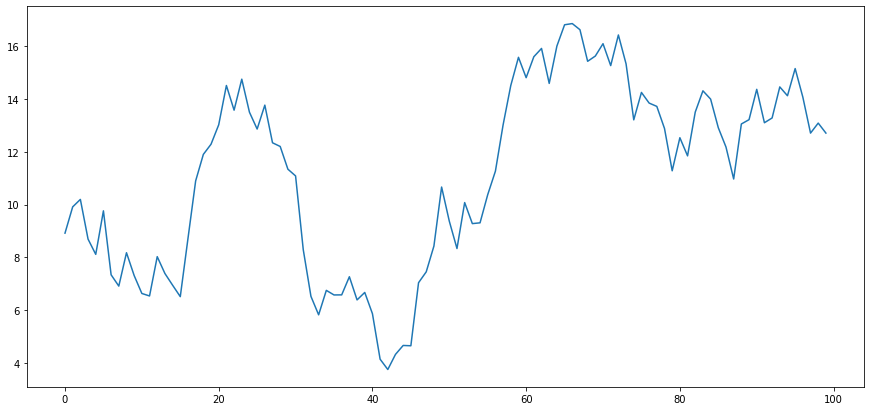

In [4]:
np.random.seed(123)
Symbol1_returns = np.random.normal(0, 1, 100)
Symbol1_prices = pd.Series(np.cumsum(Symbol1_returns), name='Symbol1') + 10
Symbol1_prices.plot(figsize=(15, 7))
plt.show()

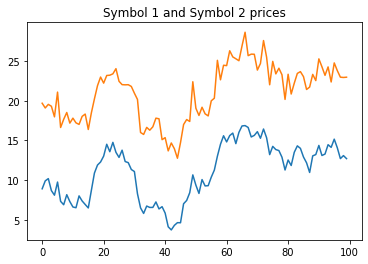

In [7]:
noise = np.random.normal(0, 1, 100)
Symbol2_prices = Symbol1_prices + 10 + noise
Symbol1_prices.name = 'Symbol2'
# print(Symbol2_prices)
plt.title('Symbol 1 and Symbol 2 prices')
Symbol1_prices.plot()
Symbol2_prices.plot()
plt.show()

<AxesSubplot:>

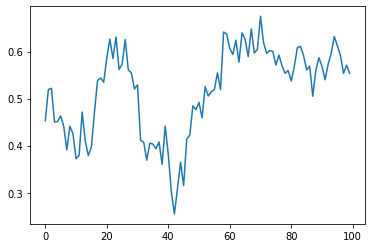

In [9]:
score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)

def zscore(series):
    return (series - series.mean()) / np.std(series)

ratios = Symbol1_prices / Symbol2_prices

ratios.plot()

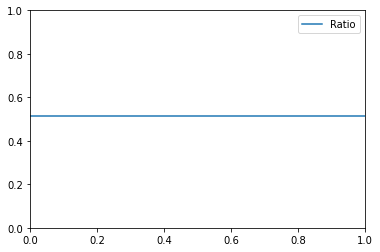

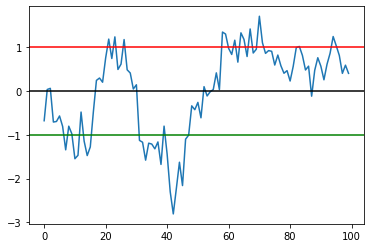

In [12]:
train = ratios[:75]
test = ratios[75:]

plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()

zscore(ratios).plot()

plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

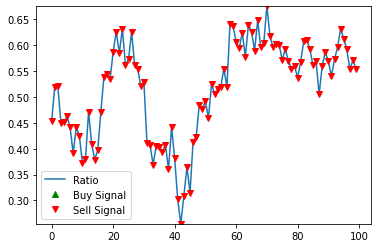

In [13]:
ratios.plot()

buy = ratios.copy()
sell = ratios.copy()

buy[zscore(ratios) > -1] = 0
buy[zscore(ratios) < 1] = 0

buy.plot(color='g', linestyle='none', marker='^')
sell.plot(color='r', linestyle='none', marker='v')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()
